11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3807 - val_loss: 0.1870
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1773 - val_loss: 0.1527
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1488 - val_loss: 0.1333
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1312 - val_loss: 0.1211
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1205 - val_loss: 0.1128
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1125 - val_loss: 0.1069
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1071 - val_loss: 0.1028
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1032 - val_loss: 0.0997
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1003 - val_loss: 0.0974
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0982 - val_loss: 0.0956
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0967 - val_loss: 0.0944
E

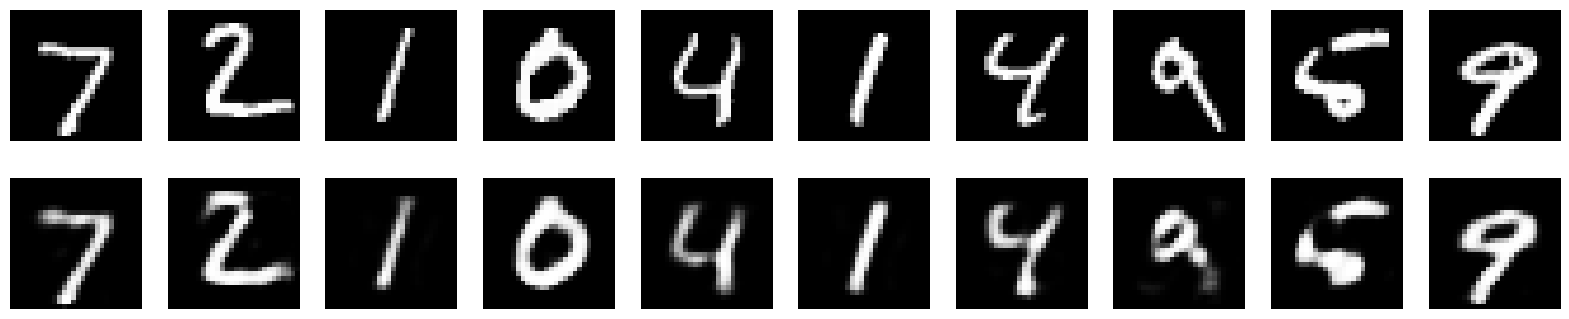

 Basic Autoencoder Training and Reconstruction Completed.


In [1]:
#part - 1

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize images to range [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 -> 784)
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# Define encoding dimension (bottleneck size)
encoding_dim = 32  

# Define the autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation="relu")(input_img)
decoded = Dense(784, activation="sigmoid")(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train the autoencoder
autoencoder.fit(x_train, x_train, 
                epochs=50, 
                batch_size=256, 
                shuffle=True, 
                validation_data=(x_test, x_test))

# Encode and decode some test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    
    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()

print(" Basic Autoencoder Training and Reconstruction Completed.")

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3688 - val_loss: 0.2101
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1975 - val_loss: 0.1704
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1668 - val_loss: 0.1533
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1513 - val_loss: 0.1407
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1398 - val_loss: 0.1322
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1318 - val_loss: 0.1258
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1265 - val_loss: 0.1224
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1228 - val_loss: 0.1203
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1209 - val_loss: 0.1189
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1194 - val_loss: 0.1179
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1187 - val_loss: 0.1172
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

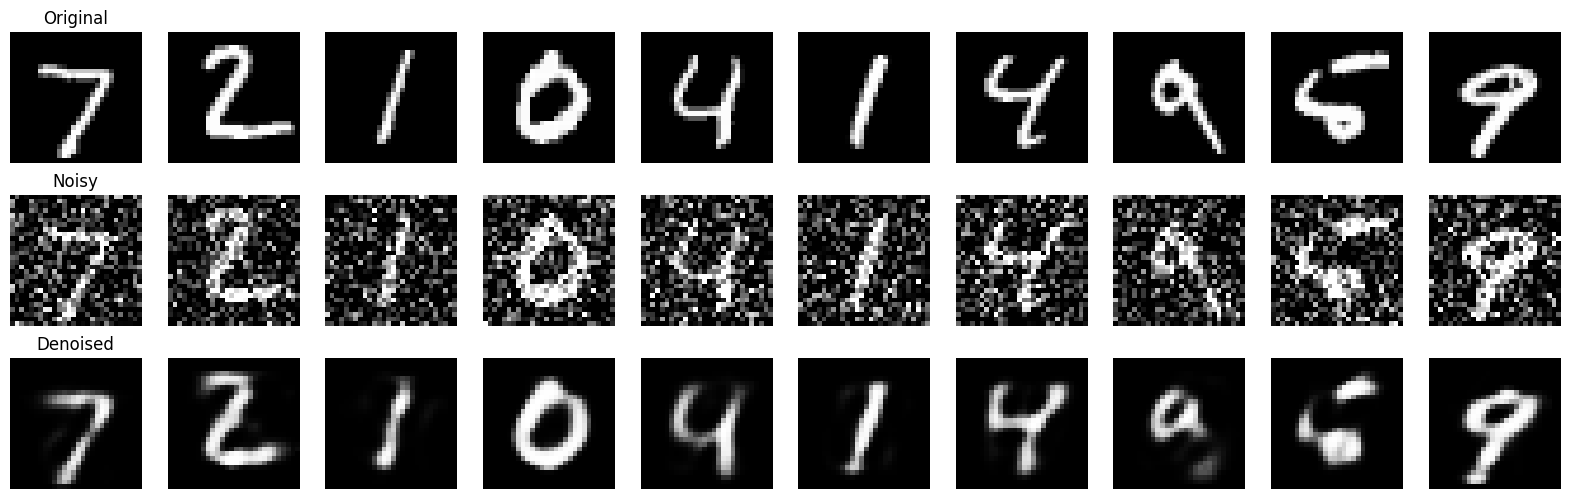

Denoising Autoencoder Training and Reconstruction Completed Successfully.


In [2]:
# Part 2

# Importing all required libraries 
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Loading the MNIST dataset which has images of handwritten digits
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizing the pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flattening the images to make them 1D arrays of size 784 instead of 28x28
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# Adding noise to the dataset to make the task difficult for autoencoder
noise_factor = 0.4  # Increasing this will add more noise
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Ensuring that all values remain between 0 and 1, otherwise training will be affected
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Defining the encoding dimension, this is the bottleneck layer size
encoding_dim = 32  

# Defining the architecture of autoencoder using fully connected layers
input_img = Input(shape=(784,))  # Input layer, since each image has 784 pixels
encoded = Dense(encoding_dim, activation="relu")(input_img)  # Encoder layer
decoded = Dense(784, activation="sigmoid")(encoded)  # Decoder layer to reconstruct the image

# Creating the autoencoder model
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)  # Encoder model for extracting compressed representation

# Compiling the model using Adam optimizer and binary cross-entropy loss
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Training the model where input is noisy image and output is clean image
autoencoder.fit(x_train_noisy, x_train, 
                epochs=50, 
                batch_size=256, 
                shuffle=True, 
                validation_data=(x_test_noisy, x_test))

# Using the trained model to reconstruct the images
decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

# Plotting the original, noisy, and denoised images to see the difference
n = 10  # How many images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Plotting original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 0:
        ax.set_title("Original")

    # Plotting noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 0:
        ax.set_title("Noisy")

    # Plotting denoised images (output of the autoencoder)
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 0:
        ax.set_title("Denoised")

plt.show()

print("Denoising Autoencoder Training and Reconstruction Completed Successfully.")

In [3]:
# Part 3
'''
	•	Effect of Reducing Bottleneck Size
When bottleneck size is reduced the quality of reconstructed images decreases A very 
small bottleneck removes too much information making the images blurry and distorted 
A moderate bottleneck helps to keep important details while reducing unnecessary data

	•	Impact of Adding Noise on Reconstruction Quality
Adding noise makes it harder for autoencoder to learn the patterns The model has to 
recognize useful features while ignoring noise If noise is too much the reconstruction 
becomes unclear but with limited noise the denoising autoencoder still gives good results

	•	Which Autoencoder is Better for Noisy RealWorld Data
Denoising autoencoder is better because it learns to remove noise and keep main structure 
of image It is useful for realworld noisy data like medical scans satellite images and 
low-quality pictures because it can recover the actual content more effectively than basic 
autoencoder
'''

'\n\t•\tEffect of Reducing Bottleneck Size\nWhen bottleneck size is reduced the quality of reconstructed images decreases A very \nsmall bottleneck removes too much information making the images blurry and distorted \nA moderate bottleneck helps to keep important details while reducing unnecessary data\n\n\t•\tImpact of Adding Noise on Reconstruction Quality\nAdding noise makes it harder for autoencoder to learn the patterns The model has to \nrecognize useful features while ignoring noise If noise is too much the reconstruction \nbecomes unclear but with limited noise the denoising autoencoder still gives good results\n\n\t•\tWhich Autoencoder is Better for Noisy RealWorld Data\nDenoising autoencoder is better because it learns to remove noise and keep main structure \nof image It is useful for realworld noisy data like medical scans satellite images and \nlow-quality pictures because it can recover the actual content more effectively than basic \nautoencoder\n'